In [97]:
import gym
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.version
from gym import wrappers

In [98]:
env = gym.make('LunarLander-v2')

[2017-05-27 18:05:23,157] Making new env: LunarLander-v2


In [99]:
np.argmax([0,1,2,3])

3

In [100]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [101]:
def run_episode(env, weights):
    observation = env.reset()
    total_reward = 0
    while True:
        y = weights.dot(observation)
        action = np.argmax(y)
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward

In [102]:
def run_episode_stoch(env, weights):
    observation = env.reset()
    total_reward = 0
    while True:
        y = softmax(weights.dot(observation))
        action = np.random.choice(4,p=y)
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward

In [103]:
obs_n = len(env.observation_space.sample())
act_n = env.action_space.n
print obs_n
print act_n

8
4


### Random search

Neural network with no hidden units, softmax output

In [104]:
weights = np.random.normal(-1,1,(act_n,obs_n))

In [105]:
best_reward = 0
best_weights = weights
reward_history = []
for i in range(1000):
    weights = np.random.uniform(-1,1,(act_n,obs_n))
    reward = run_episode(env, weights) 
    reward_history.append(reward)
    if reward > best_reward:
        best_weights = weights
        best_reward = reward

In [106]:
run_episode(env, best_weights)

-149.45291081315654

In [107]:
best_reward

191.91710519164872

In [118]:
observation = env.reset()
for t in range(2000):
    env.render()
    y = best_weights.dot(observation)
    action = np.argmax(y)
    observation, reward, done, info = env.step(action)
    if done:
        env.render(close=True)
        break

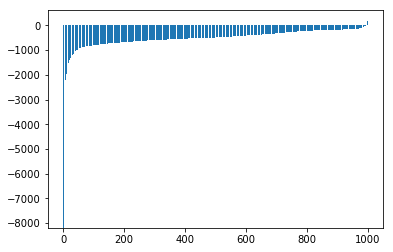

In [110]:
x = np.arange(len(reward_history))
plt.bar(x, sorted(reward_history))
plt.show()

### Hill climbing

In [94]:
best_weights = np.zeros((act_n, obs_n))
reward_history = []
for i in range(1):
    reward = -10000
    weights = np.random.uniform(-1,1,(act_n, obs_n))
    new_weights = weights
    for j in range(100):
        print 'iter:{0}, reward:{1}\r'.format(j, reward),
        for k in range(act_n):
            for l in range(obs_n):
                add = np.zeros((act_n, obs_n))
                add[k,l] = np.random.normal(0,.9**j)
                new_weights = weights + add
                new_reward = run_episode(env, new_weights) 
                if new_reward > reward:
                    weights = new_weights
                    reward = new_reward
    reward_history.append(reward)
    if reward > best_reward:
        best_weights = weights
        best_reward = reward

KeyboardInterrupt: 

In [95]:
reward_history

[]

In [96]:
observation = env.reset()
for t in range(2000):
    env.render()
    y = best_weights.dot(observation)
    action = np.argmax(y)
    observation, reward, done, info = env.step(action)
    if done:
        env.render(close=True)
        break

AssertionError: IsLocked() == false

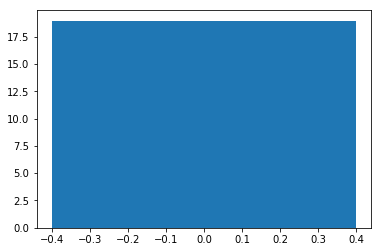

In [71]:
x = np.arange(len(reward_history))
plt.bar(x, sorted(reward_history))
plt.show()